In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
len(df)

31165

# 1. In how many cities Summer Olympics is held so far?

In [4]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [5]:
print("There are",len(df['City'].unique()), "Cities where Summer Olympics is held so far")

There are 22 Cities where Summer Olympics is held so far


# 

# 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [6]:
data = df[df['Medal'] == 'Gold'].groupby(['Sport']).size().reset_index(name='No. of Medal').sort_values(by = 'No. of Medal',
                                                                                        ascending = False)[:5]

In [7]:
data

,Sport,No. of Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


<AxesSubplot:xlabel='Sport'>

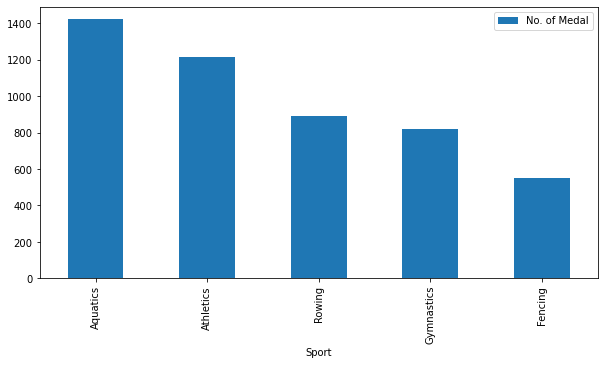

In [8]:
pd.DataFrame(data,columns = ['Sport','No. of Medal']).sort_values(by='No. of Medal',
    ascending=False).head().plot(x = 'Sport', y = 'No. of Medal', kind = 'bar', figsize = (10,5))


# 3. Which sport is having most number of medals so far? (Top 5)

In [9]:
data1 = []
for Sport in df['Sport'].unique():
    data1.append([Sport, len(df[df['Sport'] ==  Sport])])
    
data1 = pd.DataFrame(data1,columns = ['Sport','No. of Medal'])
data1.sort_values(by = 'No. of Medal', ascending = False).head()

,Sport,No. of Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


<AxesSubplot:xlabel='Sport'>

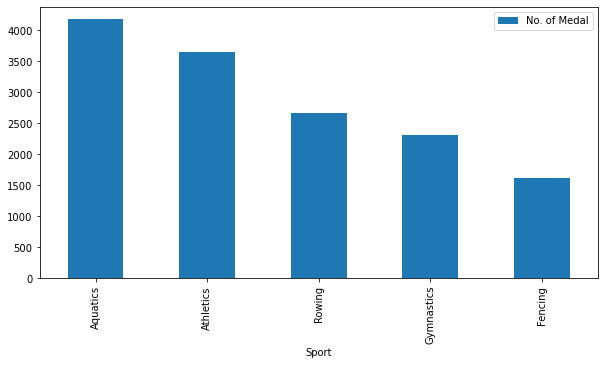

In [10]:
pd.DataFrame(data1,columns = ['Sport','No. of Medal']).sort_values(by='No. of Medal',
    ascending=False).head().plot(x = 'Sport', y = 'No. of Medal', kind = 'bar', figsize = (10,5))


# 

# 4. Which player has won most number of medals? (Top 5)

In [11]:
#Technique First

data2 = []
for Athlete in df['Athlete'].unique():
    data2.append([Athlete, len(df[df['Athlete'] ==  Athlete])])
    
data2 = pd.DataFrame(data2,columns = ['Athlete','Medals Count'])
data2.sort_values(by = 'Medals Count', ascending = False).head()

,Athlete,Medals Count
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


In [12]:
#Technique Second

data2 = df.groupby(['Athlete']).size().reset_index(name='Medals Count').sort_values(by = 'Medals Count',ascending = False)[:5]
data2

,Athlete,Medals Count
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13


<AxesSubplot:xlabel='Athlete'>

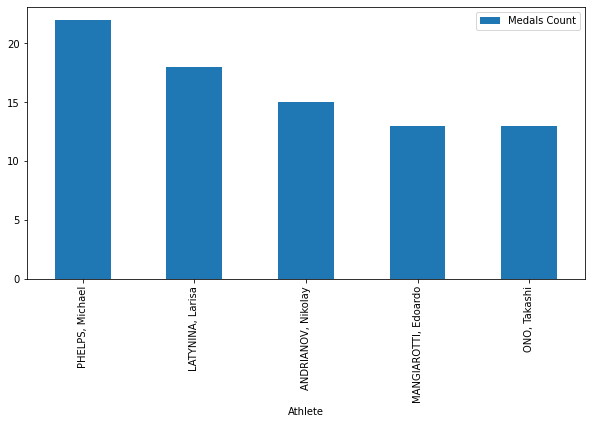

In [13]:
pd.DataFrame(data2,columns = ['Athlete','Medals Count']).sort_values(by='Medals Count',
    ascending=False).head().plot(x = 'Athlete', y = 'Medals Count', kind = 'bar', figsize = (10,5))


# 

# 5. Which player has won most number Gold Medals of medals? (Top 5)

In [14]:
# we have choosen only gold data
# then group athelete and with count
# sort by count descending order 
# taking top 5 value
data3 =df[df['Medal'] == 'Gold'].groupby(['Athlete']).size().reset_index(name='Gold Medals').sort_values(by = 'Gold Medals',
                                                                                        ascending = False)[:5]
data3

,Athlete,Gold Medals
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9


<AxesSubplot:xlabel='Athlete'>

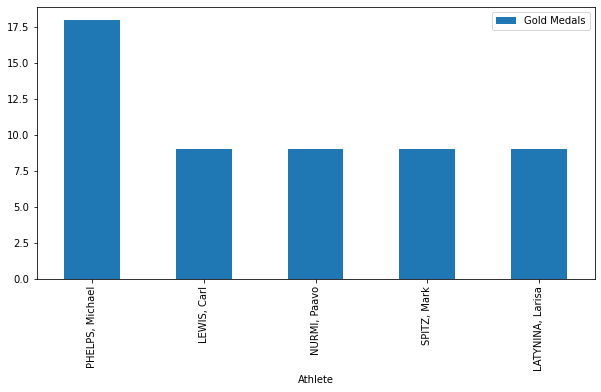

In [15]:
pd.DataFrame(data3,columns = ['Athlete','Gold Medals']).sort_values(by='Gold Medals',
    ascending=False).head().plot(x = 'Athlete', y = 'Gold Medals', kind = 'bar', figsize = (10,5))


# 

# 6. In which year India won first Gold Medal in Summer Olympics?

In [16]:
#we have choosen Country = IND 
#Then choose Medal = Gold
#Sort by Year descending order
#Taking first value

data4 =df[(df['Country'] == 'IND') & (df['Medal'] == 'Gold')].sort_values(by = 'Year', ascending = True)[:1]

data4

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


# 

#  7. Which event is most popular in terms on number of players? (Top 5)

In [18]:
#Groupby Event take unique events
#Size Counting the number 
#sort descending order
#Top 5 data


Data = df.groupby(['Event']).size().reset_index(name='Event Count').sort_values(by = 'Event Count',ascending = False)[:5]

Data

,Event,Event Count
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973


<AxesSubplot:xlabel='Event'>

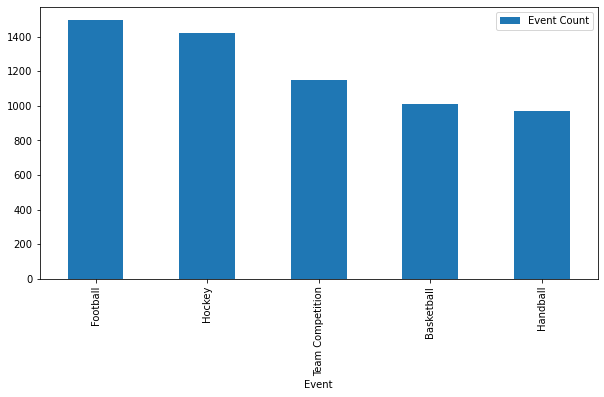

In [19]:
pd.DataFrame(Data,columns = ['Event','Event Count']).sort_values(by='Event Count',
    ascending=False).head().plot(x = 'Event', y = 'Event Count', kind = 'bar', figsize = (10,5))


# 

# 8. Which sport is having most female Gold Medalists? (Top 5)¶

In [20]:
#In dataframe take only data where Gender is Women and save it into data5

data5 = df[df['Gender'] == 'Women']
data5.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze


In [21]:
#In data5 take Only data where medal is Gold and save it to data6

data6 = data5[data5['Medal'] == 'Gold']
data6.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold


In [22]:
#Technique First

data7 = []
for Sport in data6['Sport'].unique():
    data7.append([Sport, len(data6[data6['Sport'] ==  Sport])])
    
data7 = pd.DataFrame(data7,columns = ['Sport','Gold Medal'])
data7.sort_values(by = 'Gold Medal', ascending = False).head()

,Sport,Gold Medal
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


In [23]:
#Technique second


data7 = data6.groupby(['Sport']).size().reset_index(name='Gold Medal').sort_values(by = 'Gold Medal',ascending = False)[:5]
data7

,Sport,Gold Medal
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166


<AxesSubplot:xlabel='Sport'>

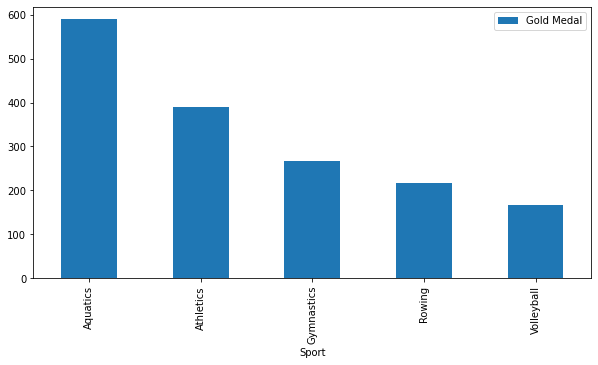

In [24]:
pd.DataFrame(data7,columns = ['Sport','Gold Medal']).sort_values(by='Gold Medal',
    ascending=False).head().plot(x = 'Sport', y = 'Gold Medal', kind = 'bar', figsize = (10,5))
